<a href="https://colab.research.google.com/github/my3sheth/BI-Data-Science/blob/main/Task%202%20-%20Titanic%20Survival%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TASK 2: Build a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python.**

In [ ]:
import pandas as pd
data=pd.read_csv('/content/Titanic Prediction.csv')

In [ ]:
data.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
90,92,0,3,Male,20.0,0,0,7.8542,3
286,288,0,3,Male,22.0,0,0,7.8958,3
67,69,1,3,female,17.0,4,2,7.9250,3
578,580,1,3,Male,32.0,0,0,7.9250,3
711,713,1,1,Male,48.0,1,0,52.0000,3


In [ ]:
data.rename(columns={'Parch':'ParCh'},inplace=True)

# *1. EDA (Exploratory Data Analysis)*

In [ ]:
data.shape

(889, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   ParCh        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


### ***Observation:***
There are no null values in the dataset.

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
ParCh          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data.duplicated().sum()

0

# *2. Preprocessing and Building the Model*

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [ ]:
data=data.drop('PassengerId', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Survived', axis=1)
y = data['Survived']

In [ ]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked
684,0,2,Male,25.0,1,2,41.5792,1
646,1,1,Male,56.0,0,0,35.5000,1
463,0,3,Male,60.0,0,0,8.0500,3
18,0,3,female,31.0,1,0,18.0000,3
16,0,3,Male,2.0,4,1,29.1250,2


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])

In [ ]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked
803,1,3,Male,27.0,0,0,6.975,3
728,0,3,female,25.0,1,0,7.925,3
757,0,3,Male,34.0,0,0,8.050,3
354,0,3,Male,28.0,0,0,9.500,3
827,1,3,Male,60.0,0,0,7.750,2


In [ ]:
data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

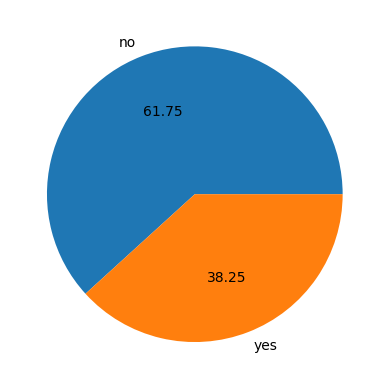

In [ ]:
import matplotlib.pyplot as plt
plt.pie(data['Survived'].value_counts(), labels=['no','yes'],autopct='%0.2f')
plt.show()

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked
0,0,3,Male,22.0,1,0,7.2500,3
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,3
3,1,1,female,35.0,1,0,53.1000,3
4,0,3,Male,35.0,0,0,8.0500,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(889, 7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

In [ ]:
best_model = None
best_accuracy = 0

In [ ]:
for name, model in models.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f} \n")
    print(f"Precision: {precision:.2f} \n")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred),"\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred),'\n')
    print("=" * 50)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_pipeline

Model: Logistic Regression
Accuracy: 0.79 

Precision: 0.72 

Confusion Matrix:
[[88 21]
 [16 53]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178
 

Model: Support Vector Machine
Accuracy: 0.83 

Precision: 0.78 

Confusion Matrix:
[[94 15]
 [16 53]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       109
           1       0.78      0.77      0.77        69

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178
 

Model: Random Forest
Accuracy: 0.75 

Precision: 0.67 

Confusion Matrix:
[[85 24]
 [20 49]

In [ ]:
print(f"The best model is {type(best_model.named_steps['classifier']).__name__} with an accuracy of {best_accuracy:.2f}")

The best model is SVC with an accuracy of 0.83


In [ ]:
selected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'ParCh', 'Fare', 'Embarked']
user_input_data = data[selected_columns].copy()

In [ ]:
print("\nLet's check for survival!\nEnter passenger details:")

pclass = int(input("Pclass (1, 2, or 3): "))
sex = int(input("Sex (0 for female, 1 for male): "))
age = float(input("Age: "))
sibsp = int(input("Siblings/Spouses Aboard: "))
parch = int(input("Parents/Children Aboard: "))
fare = float(input("Fare: "))
embarked = input("Embarked (C, Q, or S): ")
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
embarked = embarked_mapping.get(embarked, embarked)

user_input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'ParCh': [parch],
    'Fare': [fare],
    'Embarked': [embarked]
})
user_survival_prediction = best_model.predict(user_input_data)[0]

if user_survival_prediction == 1:
    print("\nThe passenger is predicted to survive!")
else:
    print("\nThe passenger is predicted not to survive.")


Let's check for survival!
Enter passenger details:
Pclass (1, 2, or 3): 3
Sex (0 for female, 1 for male): 1
Age: 56
Siblings/Spouses Aboard: 1
Parents/Children Aboard: 2
Fare: 71
Embarked (C, Q, or S): S

The passenger is predicted not to survive.
